# Application of Exploratory Data Analysis and ML for  Production of Oil and Gas
**Introduction** -
Unconventional tight gas/oil reservoirs compared with the conventional reservoir are highly heterogeneous and have complex petrophysical and geological systems, so there are high costs and large uncertainty in the development and reservoir management of the unconventional reservoir. The process of understanding the production from such a field is a complex problem and has always been challenging.

The objective of this study is to answer the following business queries when exploiting unconventional reservoirs in order to help the business unit using exploratory data analytics and machine learning.

**1.Identify the wells which are producing less and more?**

**2.Understand why some wells seem good (producing more oil) and others poor?**

**3.What are the key parameters that influence the production?**

**4.How can we improve the oil production from low producing wells, the ultimate goal of this study?**



## Importing Dependencies
The first step is to import all of the modules, functions, and objects we are going to use for this Analysis.

In [809]:
import pandas as pd
import numpy as np
from collections import defaultdict

#In order to Visualize the Data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

#For machine learning model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error


#  Data Preprocessing
Now let's have look at the data. summarizing data is an important process 

The next step is to load the data and perform preprocessing in order to get high-level insights 

In [810]:
# loading the well data 
df = pd.read_csv('./Data/UnconventWellsProd.csv')

In [811]:
# Dimensions of Dataset
print('The dimenstion of data set is')
print(df.shape)

# Print the first few rows of data
print()
print('The peek of the data is')
print(df.head(5))

# print the the type of the data
print()
df.info()

The dimenstion of data set is
(1000, 8)

The peek of the data is
   WellIndex    Por  LogPerm    AI       Brittle   TOC    VR  Production
0        438  17.20     1.47  3.21  VeryLowRange  1.93  2.21    9.854247
1        708  14.06     1.06  2.53  VeryLowRange  0.41  1.03   15.473562
2         56  11.80     1.16  3.43     HighRange  0.25  1.90   23.273795
3         20  13.29     1.15  3.04     HighRange  0.30  1.94   28.423573
4        592   9.57     1.32  3.34     HighRange -0.10  1.59   34.987869

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WellIndex   1000 non-null   int64  
 1   Por         1000 non-null   float64
 2   LogPerm     1000 non-null   float64
 3   AI          1000 non-null   float64
 4   Brittle     1000 non-null   object 
 5   TOC         1000 non-null   float64
 6   VR          1000 non-null   float64
 7   Production  998 n

In [812]:
# Identifying the column wich dont have null values
no_nulls = set(df.columns[df.isnull().mean() == 0])
print(no_nulls)

{'Por', 'Brittle', 'AI', 'WellIndex', 'LogPerm', 'VR', 'TOC'}


In [813]:
# counting the number of null values in column
count_nan = df['Production'].isnull().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: 2


In [814]:
print('Stastical summary of the data is')
df.describe()

Stastical summary of the data is


,WellIndex,Por,LogPerm,AI,TOC,VR,Production
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,998.000000
mean,500.500000,14.950460,1.398880,2.982610,1.003810,1.991170,2239.202857
std,288.819436,3.029634,0.405966,0.577629,0.504978,0.308194,1427.017130
min,1.000000,5.400000,0.120000,0.960000,-0.260000,0.900000,9.854247
25%,250.750000,12.857500,1.130000,2.577500,0.640000,1.810000,1193.334357
50%,500.500000,14.985000,1.390000,3.010000,0.995000,2.000000,1976.487820
75%,750.250000,17.080000,1.680000,3.360000,1.360000,2.172500,3022.688479
max,1000.000000,24.650000,2.580000,4.700000,2.710000,2.900000,8554.267033


## Data Summary 
This is the data for  1,000 unconventional wells with column name **Por** (well average porosity), **LogPerm** (log transform of permeability (to linearize the relationships with other variables)), **AI** (accoustic impedance (kg/m2s 10^6) **Brittle**      (brittness Ratio range), **TOC** (total organic carbon (%)), **VI** (vitrinite reflectance (%)), and **Production** (initial production 90 day average (MCFPD)). Note, the dataset is synthetic. 

Looking at info of the data we found:

**1. No missing values**

**2. One Categorical data types with column Brittle**

**3. 2 NAN values in Production**

From the statistical summary of data, we found minimum values for TOC are negative, which is scientifically not valid. We will replace these values with 0, and NaN values with mean

In [815]:
#filling NaN values with mean in production
fill_mean = lambda col: col.fillna(col.mean())

df['Production'] = df[['Production']].apply(fill_mean, axis = 0)

# removing negative values
num = df._get_numeric_data()
num[num < 0] = 0

# checking final stastical summary
df.describe()

,WellIndex,Por,LogPerm,AI,TOC,VR,Production
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,14.950460,1.398880,2.982610,1.006170,1.991170,2239.202857
std,288.819436,3.029634,0.405966,0.577629,0.499838,0.308194,1425.587969
min,1.000000,5.400000,0.120000,0.960000,0.000000,0.900000,9.854247
25%,250.750000,12.857500,1.130000,2.577500,0.640000,1.810000,1194.793253
50%,500.500000,14.985000,1.390000,3.010000,0.995000,2.000000,1978.998375
75%,750.250000,17.080000,1.680000,3.360000,1.360000,2.172500,3022.572380
max,1000.000000,24.650000,2.580000,4.700000,2.710000,2.900000,8554.267033


# EDA to visualize data and gain insights

We now got some basic ideas about the data. In order to get more insights, we need to extend with visualizations. 
We are going to look at three types of plots:
*1.Histogram to see the distribution of each parameter*

*2.Density to see the skewness of each parameter*

*3.Heat map of the pairwise correlation of numeric features*

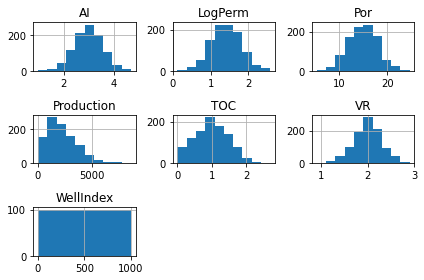

In [816]:
# histograms
df.hist()
plt.tight_layout()

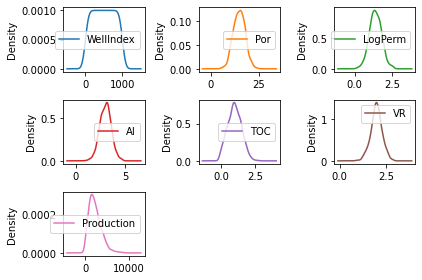

In [817]:
# Density plots
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.tight_layout()
plt.show()

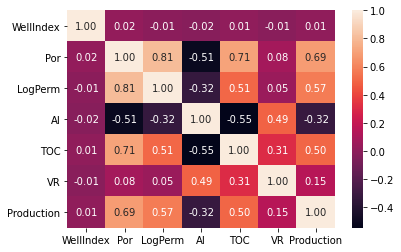

In [818]:
# Heatmap
sns.heatmap(df.corr(method = 'pearson'), annot=True, fmt=".2f")
#sns.heatmap(df.corr(method = 'spearman'), annot=True, fmt=".2f")
#plt.savefig('HeatMap')

**Summary of EDA :** 
From histograms, we found that four of the input variable have gaussian distribution.
The density plot shows that production data is right-skewed.
Heatmap shows that Wellindex is least correlated and porosity permeability and total organic content are correlated with the production variable

# 1.Identify the wells which are producing less and more?



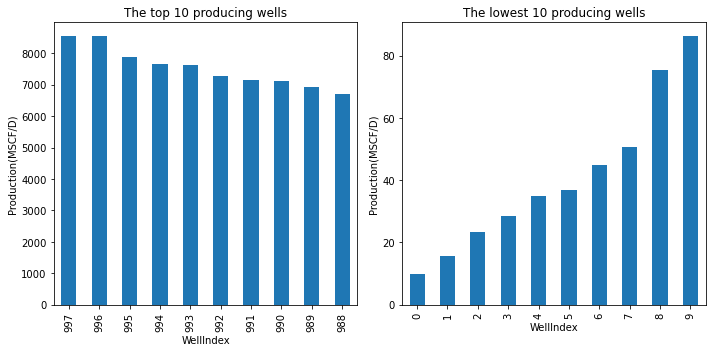

In [819]:
top10Wells = df.nlargest(10, ['Production'])
Low10Wells = df.nsmallest(10, ['Production'])

top10Production = top10Wells["Production"].iloc[0:10]
Low10Production = Low10Wells["Production"].iloc[0:10]

plt.figure(figsize=(10,5))
plt.subplot(121)
top10Production.plot(kind="bar")
plt.xlabel('WellIndex'); plt.ylabel('Production(MSCF/D)')
plt.title("The top 10 producing wells")

plt.subplot(122)
Low10Production.plot(kind="bar")
plt.xlabel('WellIndex'); plt.ylabel('Production(MSCF/D)')
plt.title("The lowest 10 producing wells")

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.2, hspace=0.8)
plt.tight_layout()
#plt.savefig('TopNLowProd')
plt.show()

Identifying the wells which are producing more and less is an important step for better management of producing oil and gas. It also helps for the designing of the surface facility, storage facility, etc

We have gathered the top 10 producing wells with a corresponding well index. The well with well index 265 is producing the highest i.e. 8554 MSCF/D

The bar plot with the lowest 10 producing well which are producing less than 100 MSCF/D. Once we know Low oil-producing wells, then next step is to communicate and discuss to the field engineer and well operator so that we can investigate more to improve their production

# Linear Regression Model to Predict the production of oil

In [820]:
def lmmodel(df):
    '''
    INPUT - DataFrame
    OUTPUT - Returns 
    r2 score for Test Dataset 
    Length of Test Datset
    r2 score for Train Dataset
    Length of Train Dataset
    '''
    #Choosing X and Y columns Y- production rate which needs to be Predicted X - Features to Tarin Model
    y=df['Production']
    X=df.drop(columns={'WellIndex','Production','Brittle'})
    
    #Splitting Test and Train Dataset
    X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.3,random_state=42)
    
    #Initiating Linear Regression Model
    lin_reg = LinearRegression()
    
    #Fit the Model
    lin_reg.fit(X_train,Y_train)
    
    #Predict the Happiness Score for Test and Train Dataset
    y_test_preds = lin_reg.predict(X_test)
    y_train_preds = lin_reg.predict(X_train)
    
    #Finding Score, Mean Squared Error and Mean Absolute Error
    score=lin_reg.score(X_test, Y_test)
    mse = mean_squared_error(Y_test, y_test_preds)
    mae = mean_absolute_error(Y_test, y_test_preds)
    
    #R2 Score for Model
    r2_test = r2_score(Y_test, y_test_preds)
    r2_train = r2_score(Y_train, y_train_preds) 
    
    #Length of Test and Train Dataset
    len_ytest = len(y_test_preds)
    len_ytrain = len(y_train_preds)
    
    return r2_test, len_ytest, r2_train, len_ytrain


In [821]:
r2_test, len_ytest, r2_train,len_ytrain = lmmodel(df)
print("The r2_test(R^2 on test data) is {} on {} values.".format(r2_test,len_ytest))
print("The r2_train(R^2 on train data) is {} on {} values.".format(r2_train,len_ytrain))

The r2_test(R^2 on test data) is 0.48550600556152057 on 300 values.
The r2_train(R^2 on train data) is 0.48326085881312697 on 700 values.


The R-Squared values are less on both test and train data we need to improve this so we will try with following method

In [822]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

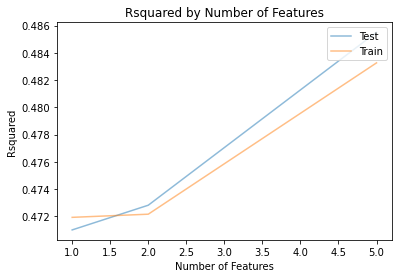

[0.47100756880363337, 0.47100756880363337, 0.4728189854495314, 0.48550600556152057, 0.48550600556152057, 0.48550600556152057, 0.48550600556152057, 0.48550600556152057, 0.48550600556152057, 0.48550600556152057] [0.4719295315606289, 0.4719295315606289, 0.4721604924556366, 0.48326085881312697, 0.48326085881312697, 0.48326085881312697, 0.48326085881312697, 0.48326085881312697, 0.48326085881312697, 0.48326085881312697]


In [823]:
y=df['Production']
X=df.drop(columns={'WellIndex','Production','Brittle'})

cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 20, 10, 5]
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)
#print(r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test)
print(r2_scores_test, r2_scores_train)

In [824]:
r2_scores_train


[0.4719295315606289,
 0.4719295315606289,
 0.4721604924556366,
 0.48326085881312697,
 0.48326085881312697,
 0.48326085881312697,
 0.48326085881312697,
 0.48326085881312697,
 0.48326085881312697,
 0.48326085881312697]

**Summary:** 
 The model is still not improved much. There is One categorical variable we will split this variable and analyze how the model will perform

# Working With Categorical Variables

In [825]:
cat_df = df.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns

cat_cols_lst = cat_df.columns
print(cat_cols_lst)
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

df_new=create_dummy_df(df,cat_cols_lst,False)

Index(['Brittle'], dtype='object')


In [826]:
df_new = df_new.drop(columns=['WellIndex'])


In [827]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    #Split into explanatory and response variables
    X = df.drop([response_col], axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'Production', cat_cols_lst, dummy_na=False)

In [828]:
#Print training and testing score
print(" The rsquared on the test data was {}.".format(train_score))

 The rsquared on the test data was 0.7826194171203882.


**Summary of LM Model:**
By splitting the categorical variable the model got improved and R-Squared change from 0.48 to 0.78 on the training data set

# 2.Understand why some wells seem good (producing more oil) and others poor?

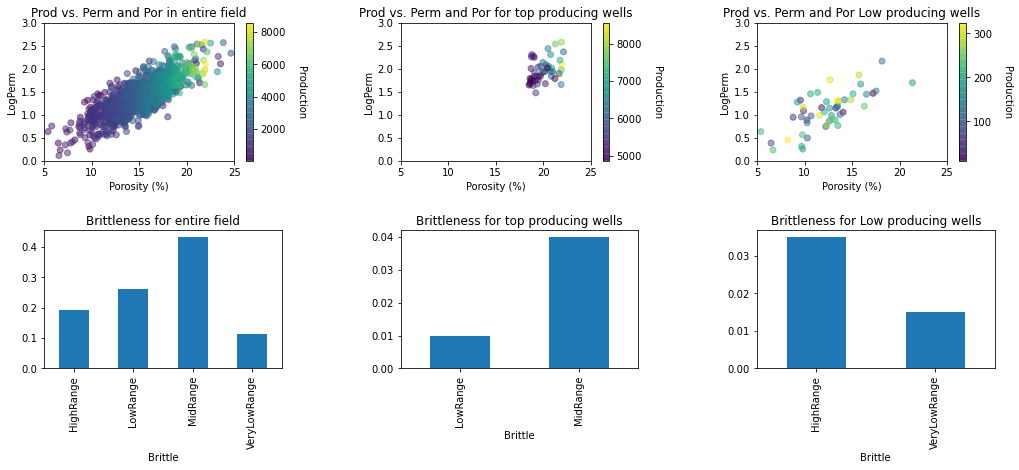

In [833]:

top50Wells = df.nlargest(50, ['Production'])
Low50Wells = df.nsmallest(50, ['Production'])

#plt.figure(figsize=(15,8))
plt.subplot(231)
im = plt.scatter(df["Por"],df["LogPerm"],s=None, c=df["Production"],  alpha=0.5)
plt.title('Prod vs. Perm and Por in entire field'); plt.xlabel('Porosity (%)'); plt.ylabel('LogPerm')
cbar = plt.colorbar(im, orientation = 'vertical'); plt.xlim(5,25); plt.ylim(0,3)
cbar.set_label("Production", rotation=270, labelpad=20)

plt.subplot(232)
im = plt.scatter(top50Wells["Por"],top50Wells["LogPerm"],s=None, c=top50Wells["Production"],  alpha=0.5)
plt.title('Prod vs. Perm and Por for top producing wells'); plt.xlabel('Porosity (%)'); plt.ylabel('LogPerm')
cbar = plt.colorbar(im, orientation = 'vertical'); plt.xlim(5,25); plt.ylim(0,3)
cbar.set_label("Production", rotation=270, labelpad=20)

plt.subplot(233)
im = plt.scatter(Low50Wells["Por"],Low50Wells["LogPerm"],s=None, c=Low50Wells["Production"],  alpha=0.5)
plt.title('Prod vs. Perm and Por Low producing wells'); plt.xlabel('Porosity (%)'); plt.ylabel('LogPerm')
cbar = plt.colorbar(im, orientation = 'vertical'); plt.xlim(5,25); plt.ylim(0,3)
cbar.set_label("Production", rotation=270, labelpad=20)

plt.subplot(234)
ed_vals = df.groupby('Brittle').Brittle.count()
im = (ed_vals/df.shape[0]).plot(kind="bar")
plt.title("Brittleness for entire field")

plt.subplot(235)
ed_vals = top50Wells.groupby('Brittle').Brittle.count()
im = (ed_vals/df.shape[0]).plot(kind="bar")
plt.title("Brittleness for top producing wells")

plt.subplot(236)
ed_vals = Low50Wells.groupby('Brittle').Brittle.count()
im = (ed_vals/df.shape[0]).plot(kind="bar")
plt.title("Brittleness for Low producing wells")


plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.5, hspace=0.5)
#plt.tight_layout()
#plt.savefig('GoodnPoor')
plt.show()

From the above plot, it is observed that wells with

**1. Higher porosity and permeability seems to produce more and wells with lower porosity and permeability seems to perform poorly**

**2. LowRange and MidRange of brittleness seems to produce more while brittleness in the high and very low range seems to perform poorly**



# 3.What are the important features that influence the production

From the above study, we found that **Permeability**, **Porosity**, and **Brittleness** are the key features that are impacting production.


# 4.How can we improve the production from low producing wells which is the ultimate goal?

In the following section, a sensitivity study is performed to improve the production from the low producing wells.
In order to perform sensitivity study Permeability, Porosity, AI, TOC, and VR are increases individually by 40% and brittleness to MidRange and compared their effect with the original.

In [834]:
newDataSens = df_new.nsmallest(50, ['Production'])
newDataSens = newDataSens.drop(columns={'Production'})

pem_Orig_preds = lm_model.predict(newDataSens)

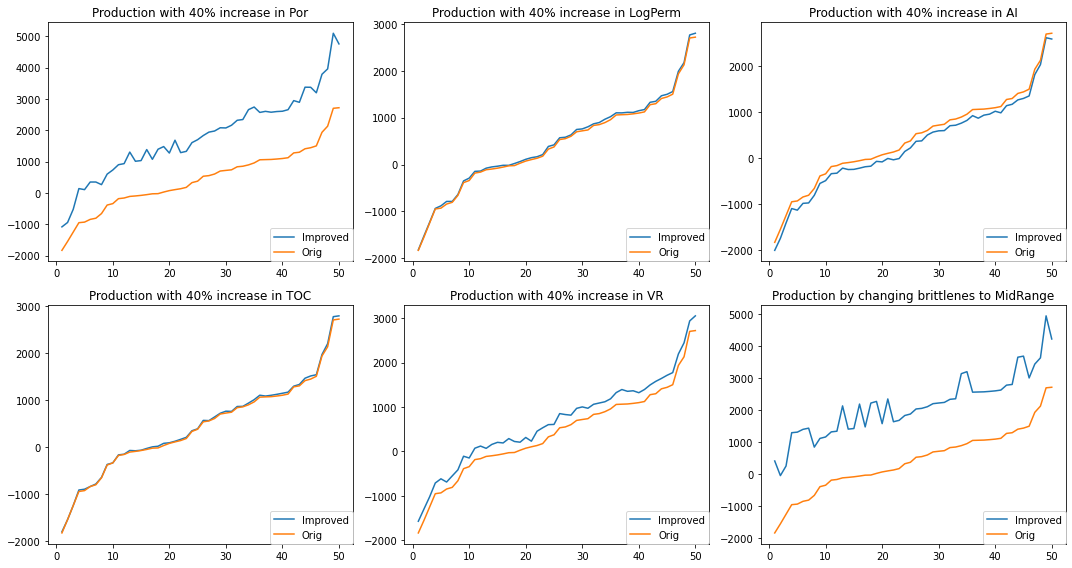

In [835]:
clmns = ["Por", "LogPerm", "AI", "TOC", "VR"]
plt.figure(figsize=(15,8))
incmnt = 231
for x in clmns:
    plt.subplot(incmnt)
    df_imp_perm = df_new.nsmallest(50, ['Production'])
    df_imp_perm = df_imp_perm.drop(columns={'Production'})
    df_imp_perm[x] = df_imp_perm[x] * 1.4
    impLogPermPreds = lm_model.predict(df_imp_perm)
    impr = np.array([impLogPermPreds, pem_Orig_preds])
    Combined = pd.DataFrame(impr.T, columns=['Improved','Original'])
    Sc = Combined.sort_values(by=['Original'],ascending=True)
    t = np.arange(1, Sc.shape[0]+1, 1)
    plt.plot(t,Sc.Improved.values,label="Improved")
    plt.plot(t, Sc.Original.values, label="Orig")
    plt.legend( loc='lower right',ncol=1, borderaxespad=0.)
    s11 = x
    s22 = "Production with 40% increase in "
    plt.title(s22 + s11)
    incmnt = incmnt + 1

#effect of improvement in porosity
plt.subplot(236)
df_imp_perm = df_new.nsmallest(50, ['Production'])
df_imp_perm = df_imp_perm.drop(columns={'Production'})
df_imp_perm['Brittle_MidRange'] = df_imp_perm['Brittle_MidRange'] + 1
df_imp_perm['Brittle_VeryLowRange'] = 0

impLogPermPreds = lm_model.predict(df_imp_perm)

impr = np.array([impLogPermPreds, pem_Orig_preds])
Combined = pd.DataFrame(impr.T, columns=['Improved','Original'])
Sc = Combined.sort_values(by=['Original'],ascending=True)
plt.plot(t,Sc.Improved.values,label="Improved")
plt.plot(t, Sc.Original.values, label="Orig")
plt.legend( loc='lower right',ncol=1, borderaxespad=0.)
plt.title('Production by changing brittlenes to MidRange')         

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.savefig('Sensitivityplot')

From the above sensitivity study, we found that production of these low producing wells  got improved significantly by improving the Porosity and changing Britlleness to MidRange while the TOC is contributing least

# Conclusion

In this analysis, we tried to understand the parameters affecting the production of oil. The above analysis can be useful for the production of oil and gas from the same field in order to design the surface facility and storage capacity. This study also can be used for predicting the production of oil and gas in advance for new wells

The insights to the field engineers and business unit to improve the production from low producing wells are that the
- Reservoir Formation with very low brittleness can be improved by fracking the formation which in turn improves both porosity and permeability.
- Reservoir formation with a Very high brittleness ratio is producing very less and performing very poorly can be abandon in order to save OPEX.
